# Figure. peQTN TSS Distances and Ciona Experiments

In [1]:
import copy
import os

import cdpybio as cpb
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pybedtools as pbt
import scipy
import seaborn as sns

import cardipspy as cpy
import ciepy

%matplotlib inline

dy_name = 'figure_peqtn_tss_distances_and_ciona_experiments'

import socket
if socket.gethostname() == 'fl-hn1' or socket.gethostname() == 'fl-hn2':
    dy = os.path.join(ciepy.root, 'sandbox', 'tmp', dy_name)
    cpy.makedir(dy)
    pbt.set_tempdir(dy)
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
sns.set_style('whitegrid')

In [3]:
pdfs = pd.read_table(os.path.join(ciepy.root, 'output', 'fine_mapping', 'tss_distance_kde.tsv'), index_col=0)

In [4]:
pdfs.columns = ['ChIA-PET interactions', 'Lead variants to TSS', 'peQTNs to TSS']

In [5]:
sns.set_palette(sns.color_palette("Dark2", 10))

/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


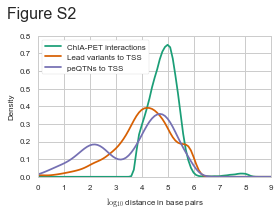

In [6]:
fig = plt.figure(figsize=(4, 3), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 0, 'Figure S2',
        size=16, va='bottom')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.85, 0.5, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax = pdfs.plot(ax=ax)
ax.legend(fontsize=8, loc='upper left', fancybox=True, frameon=True)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.set_xlabel('$\log_{10}$ distance in base pairs', fontsize=8)
ax.set_ylabel('Density', fontsize=8);
gs.tight_layout(fig, rect=[0, 0, 1, 0.9])

fig.savefig(os.path.join(outdir, 'peqtn_tss_distances.pdf'))
fig.savefig(os.path.join(outdir, 'peqtn_tss_distances.png'), dpi=300)

In [7]:
allele = ['Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
          'Ref', 'Alt', 'EV', 'Ref', 'Alt', 'EV',
         ]
construct = ['E1', 'E1', 'E1', 'E1', 'E1', 'E1', 
             'E2', 'E2', 'E2', 'E2', 'E2', 'E2', 
             'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 
             'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 
             'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 
             'E8', 'E8', 'E8', 'E8', 'E8', 'E8', 
             'E8', 'E8', 'E8', 'E8', 'E8', 'E8', 
            ]
repeat = ['Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
          'Rep. 1', 'Rep. 1', 'Rep. 1', 'Rep. 2', 'Rep. 2', 'Rep. 2',
         ]
tissue = ['TM', 'TM', 'TM', 'TM', 'TM', 'TM',
          'TM', 'TM', 'TM', 'TM', 'TM', 'TM',
          'ED', 'ED', 'ED', 'ED', 'ED', 'ED',
          'ED', 'ED', 'ED', 'ED', 'ED', 'ED',
          'TM', 'TM', 'TM', 'TM', 'TM', 'TM',
          'ED', 'ED', 'ED', 'ED', 'ED', 'ED',
          'TM', 'TM', 'TM', 'TM', 'TM', 'TM',
         ]
percent = [7, 11, 4, 10, 8, 0, 
           6, 15, 4, 4, 20, 0,
           17, 0, 0, 12, 0, 2,
           4, 6.5, 0, 6, 4, 2,
           10, 4, 4, 10, 8, 0,
           22, 12, 0, 20, 6, 0,
           26, 22, 4, 10, 14, 0
          ]
count = [7, 11, 4, 10, 8, 0, 
         6, 15, 4, 4, 20, 0,
         17, 0, 0, 12, 0, 2,
         2, 4, 0, 3, 2, 2,
         5, 2, 4, 5, 4, 0,
         11, 6, 0, 10, 3, 0,
         13, 11, 4, 5, 7, 0
        ]
number = [100, 100, 100, 100, 100, 100, 
          100, 100, 100, 100, 100, 100, 
          100, 100, 100, 100, 100, 100, 
          50, 50, 100, 50, 50, 100, 
          50, 50, 100, 50, 50, 100, 
          50, 50, 50, 50, 50, 50, 
          50, 50, 50, 50, 50, 50, 
         ]
diff = [False, False, False, False, False, False, 
        True, True, True, True, True, True, 
        True, True, True, True, True, True, 
        False, False, False, False, False, False, 
        False, False, False, False, False, False, 
        True, True, True, True, True, True, 
        False, False, False, False, False, False, 
       ]
ciona_res = pd.DataFrame({'allele':allele, 'construct':construct,
                          'repeat':repeat, 'tissue':tissue, 
                          'percent':percent, 'different':diff,
                          'count':count, 'number':number})

In [8]:
import scipy.stats as stats

In [9]:
# WORKING HERE: Are my counts correct? Can I do a stats test?
pvals = {}
for c in set(ciona_res.construct):
    tdf = ciona_res[ciona_res.construct == c]
    for t in set(tdf.tissue):
        tdf2 = tdf[tdf.tissue == t]
        ref_count = tdf2.ix[tdf2.allele == 'Ref', 'count'].sum()
        alt_count = tdf2.ix[tdf2.allele == 'Alt', 'count'].sum()
        n = tdf2.number.values[0]
        s,p = stats.fisher_exact([[ref_count, alt_count], [n - ref_count, n - alt_count]])
        pvals[c + ', ' + t] = p
pvals = pd.Series(pvals)

In [10]:
1.561699e-02

0.01561699

In [11]:
pvals[pvals < 0.05]

E2, TM    3.407744e-05
E4, ED    3.453502e-10
E8, ED    1.561699e-02
dtype: float64

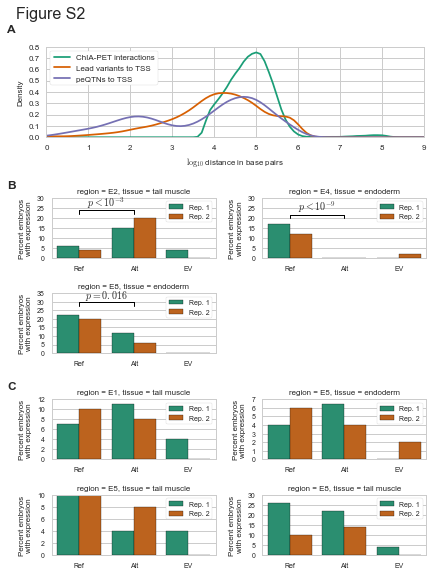

In [12]:
fig = plt.figure(figsize=(6, 8), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 0, 'Figure S2',
        size=16, va='bottom')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.95, 0.5, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax = pdfs.plot(ax=ax)
ax.legend(fontsize=8, loc='upper left', fancybox=True, frameon=True)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.set_xlabel('$\log_{10}$ distance in base pairs', fontsize=8)
ax.set_ylabel('Density', fontsize=8);
gs.tight_layout(fig, rect=[0, 0.7, 1, 0.95])

# Constructs/tissues with expression differences
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, 0])
tdf = ciona_res[ciona_res.construct == 'E2']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E2, tissue = tail muscle', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p < 10^{-3}$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

ax = fig.add_subplot(gs[0, 1])
tdf = ciona_res[ciona_res.construct == 'E4']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E4, tissue = endoderm', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p < 10^{-9}$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

ax = fig.add_subplot(gs[1, 0])
tdf = ciona_res[(ciona_res.construct == 'E8') & (ciona_res.tissue == 'ED')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E8, tissue = endoderm', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p = 0.016$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

gs.tight_layout(fig, rect=[0, 0.35, 1, 0.7])

# Construct/tissues without expression differences
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, 0])
tdf = ciona_res[ciona_res.construct == 'E1']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E1, tissue = tail muscle', fontsize=8)

ax = fig.add_subplot(gs[0, 1])
tdf = ciona_res[(ciona_res.construct == 'E5') & (ciona_res.tissue == 'ED')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E5, tissue = endoderm', fontsize=8)

ax = fig.add_subplot(gs[1, 0])
tdf = ciona_res[(ciona_res.construct == 'E5') & (ciona_res.tissue == 'TM')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E5, tissue = tail muscle', fontsize=8)

ax = fig.add_subplot(gs[1, 1])
tdf = ciona_res[(ciona_res.construct == 'E8') & (ciona_res.tissue == 'TM')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E8, tissue = tail muscle', fontsize=8)

gs.tight_layout(fig, rect=[0, 0, 1, 0.35])

t = fig.text(0.005, 0.95, 'A', weight='bold', 
             size=12)
t = fig.text(0.005, 0.68, 'B', weight='bold', 
             size=12)
t = fig.text(0.005, 0.33, 'C', weight='bold', 
             size=12)

fig.savefig(os.path.join(outdir, 'peqtn_tss_distances_ciona.pdf'))
fig.savefig(os.path.join(outdir, 'peqtn_tss_distances_ciona.png'), dpi=300)

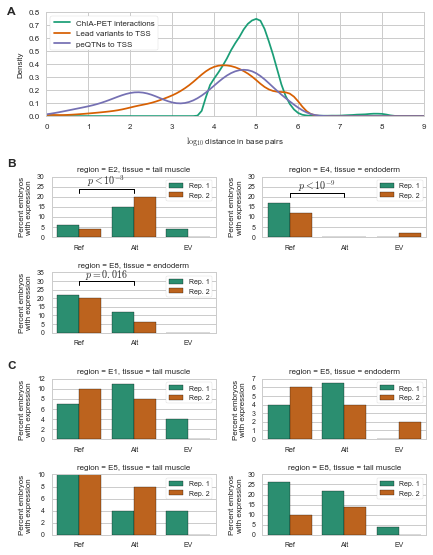

In [15]:
fig = plt.figure(figsize=(6, 7.8), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax = pdfs.plot(ax=ax)
ax.legend(fontsize=8, loc='upper left', fancybox=True, frameon=True)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.set_xlabel('$\log_{10}$ distance in base pairs', fontsize=8)
ax.set_ylabel('Density', fontsize=8);
gs.tight_layout(fig, rect=[0, 0.72, 1, 1])

# Constructs/tissues with expression differences
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, 0])
tdf = ciona_res[ciona_res.construct == 'E2']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E2, tissue = tail muscle', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p < 10^{-3}$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

ax = fig.add_subplot(gs[0, 1])
tdf = ciona_res[ciona_res.construct == 'E4']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E4, tissue = endoderm', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p < 10^{-9}$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

ax = fig.add_subplot(gs[1, 0])
tdf = ciona_res[(ciona_res.construct == 'E8') & (ciona_res.tissue == 'ED')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E8, tissue = endoderm', fontsize=8)
ymin, ymax = ax.get_ylim()
h = (ymax - ymin) * 0.1
ax.plot([0, 1], [ymax + 2*h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([0, 0], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.plot([1, 1], [ymax + h, ymax + 2*h], color='k', linestyle='-', linewidth=1)
ax.text(0.5, ymax + 2*h, '$p = 0.016$', ha='center', va='bottom')
ax.plot([0, 1], [ymax + 4*h, ymax + 4*h], color='k', linestyle='-', linewidth=1, alpha=0)

gs.tight_layout(fig, rect=[0, 0.36, 1, 0.72])

# Construct/tissues without expression differences
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, 0])
tdf = ciona_res[ciona_res.construct == 'E1']
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E1, tissue = tail muscle', fontsize=8)

ax = fig.add_subplot(gs[0, 1])
tdf = ciona_res[(ciona_res.construct == 'E5') & (ciona_res.tissue == 'ED')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E5, tissue = endoderm', fontsize=8)

ax = fig.add_subplot(gs[1, 0])
tdf = ciona_res[(ciona_res.construct == 'E5') & (ciona_res.tissue == 'TM')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E5, tissue = tail muscle', fontsize=8)

ax = fig.add_subplot(gs[1, 1])
tdf = ciona_res[(ciona_res.construct == 'E8') & (ciona_res.tissue == 'TM')]
sns.barplot(x='allele', y='percent', hue='repeat', data=tdf)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_ylabel('Percent embryos\nwith expression', fontsize=8)
ax.legend(fontsize=7, fancybox=True, frameon=True)
ax.set_xlabel('')
ax.set_title('region = E8, tissue = tail muscle', fontsize=8)

gs.tight_layout(fig, rect=[0, 0, 1, 0.36])

t = fig.text(0.005, 0.97, 'A', weight='bold', 
             size=12)
t = fig.text(0.005, 0.7, 'B', weight='bold', 
             size=12)
t = fig.text(0.005, 0.34, 'C', weight='bold', 
             size=12)

fig.savefig(os.path.join(outdir, 'peqtn_tss_distances_ciona.pdf'))